#  Data Science Internship – Task 1: Student Performance Analysis

This notebook demonstrates the workflow every data scientist follows:

1. Load → 2. Clean → 3. Analyze → 4. Visualize → 5. Conclude




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
d1 = pd.read_csv(r"C:\Users\nagaa\OneDrive\Desktop\Student Performance\student-mat.csv", sep=";")
d2 = pd.read_csv(r"C:\Users\nagaa\OneDrive\Desktop\Student Performance\student-por.csv", sep=";")

# Merge datasets on common columns
merge_cols = ["school", "sex", "age", "address", "famsize", "Pstatus",
              "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

d3 = pd.merge(d1, d2, on=merge_cols)

print(len(d3), "students")  # 382 students


382 students


Merge File


In [2]:
d3.to_csv(r"C:\Users\nagaa\OneDrive\Desktop\Student Performance\student-merged.csv", index=False)


## 1. Load Dataset

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\nagaa\OneDrive\Desktop\Student Performance\student-merged.csv")

# Preview first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 2. Explore & Clean Data

In [4]:
# Check dataset info
df.info()

# Shape of dataset
print("Shape:", df.shape)

# Missing values
print("Missing values:\n", df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian_x      object
traveltime_x     int64
studytime_x      int64
failures_x       int64
schoolsup_x     object
famsup_x        object
paid_x          object
activities_x    object
nursery         object
higher_x        object
internet        object
romantic_x      object
famrel_x         int64
freetime_x       int64
goout_x          int64
Dalc_x           int64
Walc_x           int64
health_x         int64
absences_x       int64
G1_x             int64
G2_x             int64
G3_x             int64
guardian_y      object
traveltime_y     int64
studytime_y      int64
failures_y       int64
schoolsup_y     object
famsup_y        object
paid_y          object
activities_y    object
higher_y        object
romantic_y      object
famrel_y   

## 3. Analysis Questions

In [9]:
# a) Average final grade (G3)
df['G3'] = (df['G3_x'] + df['G3_y']) / 2

avg_g3 = df['G3'].mean()
print("Average final grade (G3):", avg_g3)


# b) How many students scored above 15?
above_15 = (df['G3'] > 15).sum()
print("Students scoring above 15:", above_15)


# c) Correlation between study time and performance
# Use one studytime column (e.g., from math dataset)
correlation = df['studytime_x'].corr(df['G3'])
print("Correlation (studytime vs G3):", correlation)


# d) Average grade by gender
avg_by_gender = df.groupby('sex')['G3'].mean()
print("Average grades by gender:\n", avg_by_gender)


Average final grade (G3): 11.451570680628272
Students scoring above 15: 52
Correlation (studytime vs G3): 0.1855708607867769
Average grades by gender:
 sex
F    11.462121
M    11.440217
Name: G3, dtype: float64


## 4. Visualizations

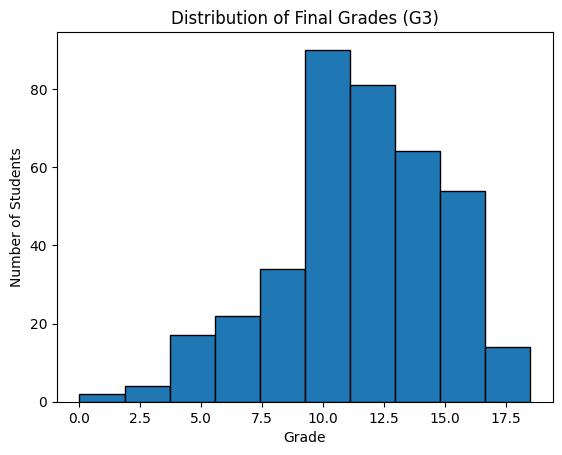

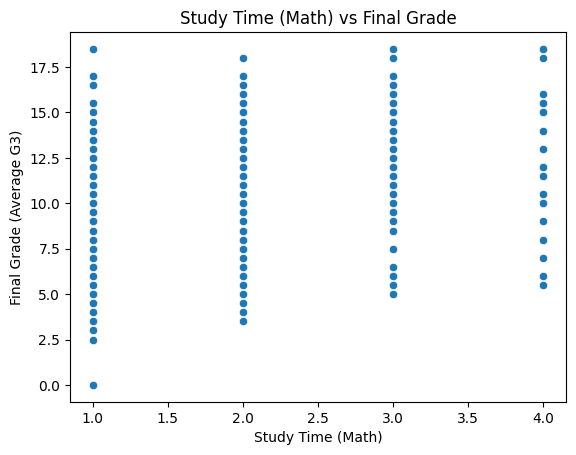

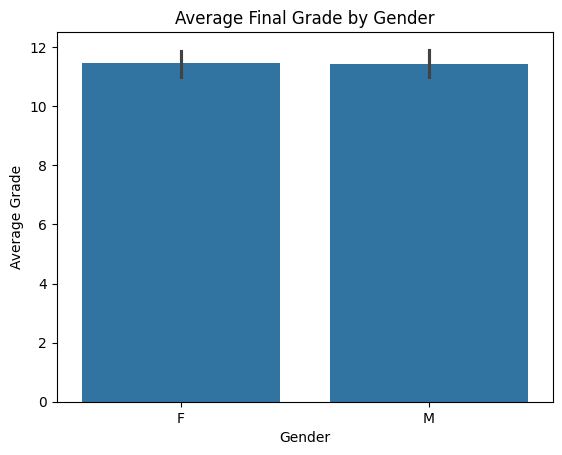

In [11]:


# Histogram of grades
plt.hist(df['G3'], bins=10, edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

# Scatterplot: study time vs grades (using studytime_x)
sns.scatterplot(x='studytime_x', y='G3', data=df)
plt.title("Study Time (Math) vs Final Grade")
plt.xlabel("Study Time (Math)")
plt.ylabel("Final Grade (Average G3)")
plt.show()

# Bar chart: male vs female average score
sns.barplot(x='sex', y='G3', data=df, estimator='mean')
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Grade")
plt.show()
